In [ ]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
basePath = "/Users/forero/data/Illustris-3/"
GroupFirstSub = il.groupcat.loadHalos(basePath,135,fields=['GroupFirstSub'])

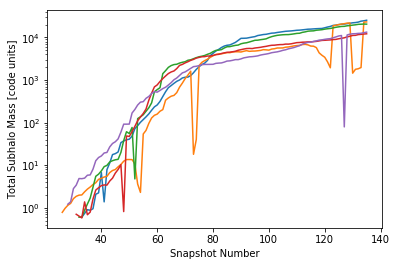

In [3]:
fields = ['SubhaloMass','SubfindID','SnapNum']
start = 0
for i in range(start,start+5):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    plt.plot(tree['SnapNum'],tree['SubhaloMass'],'-')
plt.yscale('log')
plt.xlabel('Snapshot Number')
plt.ylabel('Total Subhalo Mass [code units]')

In [4]:
def find_formation_time(sublinktree):
    final_mass = sublinktree['SubhaloMass'][0]
    initial_mass = sublinktree['SubhaloMass'][-1]
    n_points = len(sublinktree['SubhaloMass'])
    formation_snap = -1
    for i in range(n_points-1, -1, -1):
        if sublinktree['SubhaloMass'][i] > final_mass/2.0:
            formation_snap = sublinktree['SnapNum'][i]
            break
    return formation_snap

In [5]:
fields = ['SubhaloMass','SubfindID','SnapNum']
start = 0
n_halos = 5000
formation_time = []
final_mass = []
for i in range(start,start+n_halos):
    tree = il.sublink.loadTree(basePath,135,GroupFirstSub[i],fields=fields,onlyMPB=True)
    formation_time.append(find_formation_time(tree))
    final_mass.append(tree['SubhaloMass'][0])
    

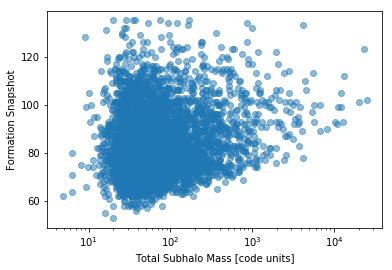

In [6]:
plt.scatter(final_mass, formation_time, alpha=0.5)
plt.ylabel('Formation Snapshot')
plt.xscale('log')
plt.xlabel('Total Subhalo Mass [code units]')

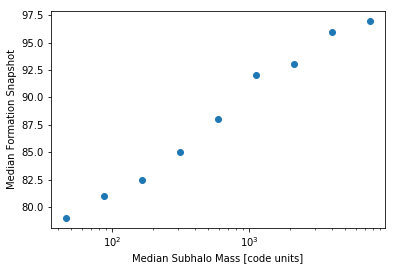

In [10]:
final_mass = np.array(final_mass)
formation_time = np.array(formation_time)

n_bins = 10
mass_bins = np.logspace(1.5,4,n_bins)
median_formation = np.ones(n_bins-1)
for i in range(n_bins-1):
    ii = (final_mass > mass_bins[i]) & (final_mass < mass_bins[i+1])
    median_formation[i] = np.median(formation_time[ii])
    
centered_mass_bin = 0.5*(mass_bins[1:] + mass_bins[0:-1])

plt.scatter(centered_mass_bin, median_formation)
plt.ylabel('Median Formation Snapshot')
plt.xscale('log')
plt.xlabel('Median Subhalo Mass [code units]')